In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib
import matplotlib.pyplot as plt
import ronan
import pandas as pd
import os
import PIL

In [2]:
path = '../../../data/kaggle/painter-by-numbers/'

In [3]:
!ls {path}/*.csv

../../../data/kaggle/painter-by-numbers//sampleSubmission.csv
../../../data/kaggle/painter-by-numbers//submission_info.csv
../../../data/kaggle/painter-by-numbers//train_info.csv


In [4]:
pd.read_csv(os.path.join(path, 'sampleSubmission.csv')).head()

,index,sameArtist
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [5]:
train_info = pd.read_csv(os.path.join(path, 'train_info.csv'))
train_info.head()

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
1,75232.jpg,5b39c876740bfc1cfaf544721c43cac3,Vir Heroicus Sublimis,Color Field Painting,abstract,1950.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
3,62252.jpg,5b39c876740bfc1cfaf544721c43cac3,"Who’s Afraid of Red, Yellow and Blue II",Color Field Painting,abstract,NaN
4,63861.jpg,5b39c876740bfc1cfaf544721c43cac3,Black Fire I,Color Field Painting,abstract,1963.0


In [6]:
submission_info = pd.read_csv(os.path.join(path, 'submission_info.csv'))
submission_info.head()

,index,image1,image2
0,0,100005.jpg,100004.jpg
1,1,100014.jpg,100004.jpg
2,2,100014.jpg,100005.jpg
3,3,100022.jpg,100004.jpg
4,4,100022.jpg,100005.jpg


In [7]:
for filename in train_info.filename.head(10):   
    plt.figure()
    ronan.plot_painting(os.path.join('train', filename), train_info)

In [22]:
data = ronan.load_painting_datasets()

DEBUG:ronan:building labeled pairs dataset
DEBUG:ronan:labeled pairs dataset: len 1000544
DEBUG:ronan:building train, validation split
DEBUG:ronan:building unlabeled image pair dataset
DEBUG:ronan:done building dataset


In [23]:
len(data.labeled_pairs.pairs.label), data.labeled_pairs.pairs.label.sum()

(1000544, 501518)

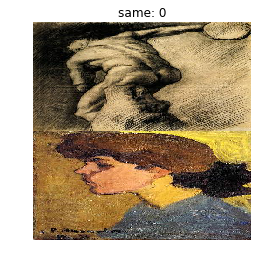

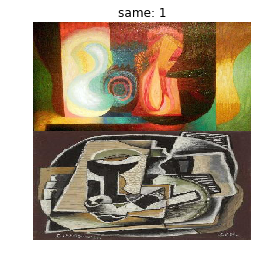

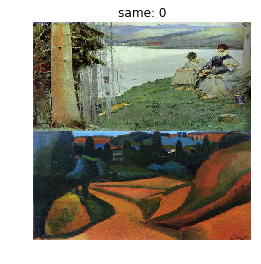

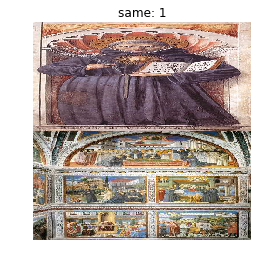

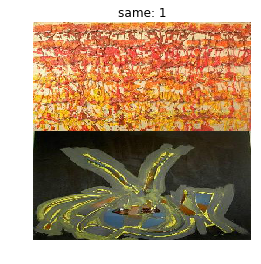

In [16]:
for i in range(5):
    plt.figure()
    plt.imshow(data.train[i][0].transpose(1, 2, 0)/255.)
    plt.title("same: {}".format(data.train[i][1]))
    plt.axis('off')

In [17]:
data.train[0][0].shape

(3, 224, 224)

In [18]:
type(data.train[0][1])

numpy.int32

In [19]:
len(data.train), len(data.validation)

(700380, 300164)